# Práctica final

## Daniel Hernández Martínez y Alejandro Corpas Calvo

In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.utils import shuffle
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score #, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, train_test_split #, cross_validate
from sklearn.tree import DecisionTreeClassifier, plot_tree
import scipy.optimize as opt
import operator
import warnings
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
pd.options.display.max_rows = 10
pd.options.display.max_columns = 10
warnings.filterwarnings("ignore")

np.set_printoptions(threshold=sys.maxsize)

### Carga de los datos

Fuente de los datos https://www.kaggle.com/adityakadiwal/water-potability

In [3]:
df = pd.read_csv('water_potability.csv')

In [4]:
df = shuffle(df)
df

ph    Hardness        Solids  Chloramines     Sulfate  \
2289  9.130607  226.403741  19968.677835     5.723792  386.699776   
477   5.679234  188.188696  35643.181208     8.882654  322.169383   
899   8.080415  166.891700  18136.128859     6.867553         NaN   
206   7.895469  154.265780   7769.616119     7.205262  258.312879   
737   6.446252  204.253563  11104.250508     7.648613         NaN   
...        ...         ...           ...          ...         ...   
796   8.787668  232.462637   7035.133797     9.306449         NaN   
2090  8.289224  191.858805  22526.279753     7.979155         NaN   
2279  7.539742  201.959317  26716.359708     5.637350         NaN   
2482  7.882124  235.466405   5477.347215     6.476057         NaN   
3046  6.174884  193.027960  23006.242223     8.098312  340.253354   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
2289    440.543099       11.751718              NaN   5.288487           0  
477     256.302559       15.000260              NaN   2.339573           0  
899     600.937203       16.307790        55.586142   4.070824           0  
206     407.732217       16.420041        63.016018   4.236947           0  
737     418.041220       16.625627              NaN   4.976958           1  
...            ...             ...              ...        ...         ...  
796     415.624882       12.051417              NaN   3.489946           1  
2090    292.860817       18.003679        72.575581   4.291001           0  
2279    516.354560       14.985649        83.536821   4.210678           0  
2482    443.894736       12.178520        34.194404   5.364172           0  
3046    297.112621       13.475158        78.325227   3.623298           0  

[3276 rows x 10 columns]

Hay que tratar los datos ya que hay muchas casillas con el valor `NaN`. Hay 2 opciones: 

Eliminar las filas que cuentan con la presencia de alguna casilla en 'blanco'. Esto nos hace descartar 1265 casos de los 3276 iniciales.

In [5]:
df_drop = df.dropna(axis=0)
df_drop

ph    Hardness        Solids  Chloramines     Sulfate  \
206   7.895469  154.265780   7769.616119     7.205262  258.312879   
1095  4.187491  208.374188  21809.709834     5.846112  327.474203   
2801  4.855588  145.790370  14905.255912     9.829675  392.667482   
2779  9.454119  224.817132  21379.963927     5.407692  227.665635   
1962  6.335683  164.070372  26594.352076     7.381256  338.429462   
...        ...         ...           ...          ...         ...   
362   6.876451  190.844514  21979.031671     5.630558  363.831706   
199   4.126529  125.474884  11215.945902     5.366011  261.444798   
363   4.812434  250.183954  11465.575643     4.362641  398.161904   
253   6.800119  242.008082  39143.403329     9.501695  187.170714   
3046  6.174884  193.027960  23006.242223     8.098312  340.253354   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
206     407.732217       16.420041        63.016018   4.236947           0  
1095    264.508083       11.235144        46.682597   4.592959           1  
2801    459.288037       10.446590        52.289484   4.697153           1  
2779    431.613001       15.772334        52.033845   4.058626           1  
1962    607.102573       14.929150       113.048886   4.578861           1  
...            ...             ...              ...        ...         ...  
362     349.186085        9.551732        68.410851   4.545341           1  
199     445.241457       18.575921        86.433655   4.460201           0  
363     607.026542       18.210032        62.511467   3.020996           1  
253     376.456593       11.432466        73.777275   3.854940           1  
3046    297.112621       13.475158        78.325227   3.623298           0  

[2011 rows x 10 columns]

Rellenar las casillas en blanco con la media de su columna. Esto nos deja con los 3276 casos disponibles.

In [6]:
df_fill = df.fillna(df.mean())
df_fill

ph    Hardness        Solids  Chloramines     Sulfate  \
2289  9.130607  226.403741  19968.677835     5.723792  386.699776   
477   5.679234  188.188696  35643.181208     8.882654  322.169383   
899   8.080415  166.891700  18136.128859     6.867553  333.775777   
206   7.895469  154.265780   7769.616119     7.205262  258.312879   
737   6.446252  204.253563  11104.250508     7.648613  333.775777   
...        ...         ...           ...          ...         ...   
796   8.787668  232.462637   7035.133797     9.306449  333.775777   
2090  8.289224  191.858805  22526.279753     7.979155  333.775777   
2279  7.539742  201.959317  26716.359708     5.637350  333.775777   
2482  7.882124  235.466405   5477.347215     6.476057  333.775777   
3046  6.174884  193.027960  23006.242223     8.098312  340.253354   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
2289    440.543099       11.751718        66.396293   5.288487           0  
477     256.302559       15.000260        66.396293   2.339573           0  
899     600.937203       16.307790        55.586142   4.070824           0  
206     407.732217       16.420041        63.016018   4.236947           0  
737     418.041220       16.625627        66.396293   4.976958           1  
...            ...             ...              ...        ...         ...  
796     415.624882       12.051417        66.396293   3.489946           1  
2090    292.860817       18.003679        72.575581   4.291001           0  
2279    516.354560       14.985649        83.536821   4.210678           0  
2482    443.894736       12.178520        34.194404   5.364172           0  
3046    297.112621       13.475158        78.325227   3.623298           0  

[3276 rows x 10 columns]

### Análisis de los datos

In [7]:
df_drop.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2011.000000  2011.000000   2011.000000  2011.000000  2011.000000   
mean      7.085990   195.968072  21917.441374     7.134338   333.224672   
std       1.573337    32.635085   8642.239815     1.584820    41.205172   
min       0.227499    73.492234    320.942611     1.390871   129.000000   
25%       6.089723   176.744938  15615.665390     6.138895   307.632511   
50%       7.027297   197.191839  20933.512750     7.143907   332.232177   
75%       8.052969   216.441070  27182.587067     8.109726   359.330555   
max      14.000000   317.338124  56488.672413    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   2011.000000     2011.000000      2011.000000  2011.000000  2011.000000  
mean     426.526409       14.357709        66.400859     3.969729     0.403282  
std       80.712572        3.324959        16.077109     0.780346     0.490678  
min      201.619737        2.200000         8.577013     1.450000     0.000000  
25%      366.680307       12.124105        55.952664     3.442915     0.000000  
50%      423.455906       14.322019        66.542198     3.968177     0.000000  
75%      482.373169       16.683049        77.291925     4.514175     1.000000  
max      753.342620       27.006707       124.000000     6.494749     1.000000

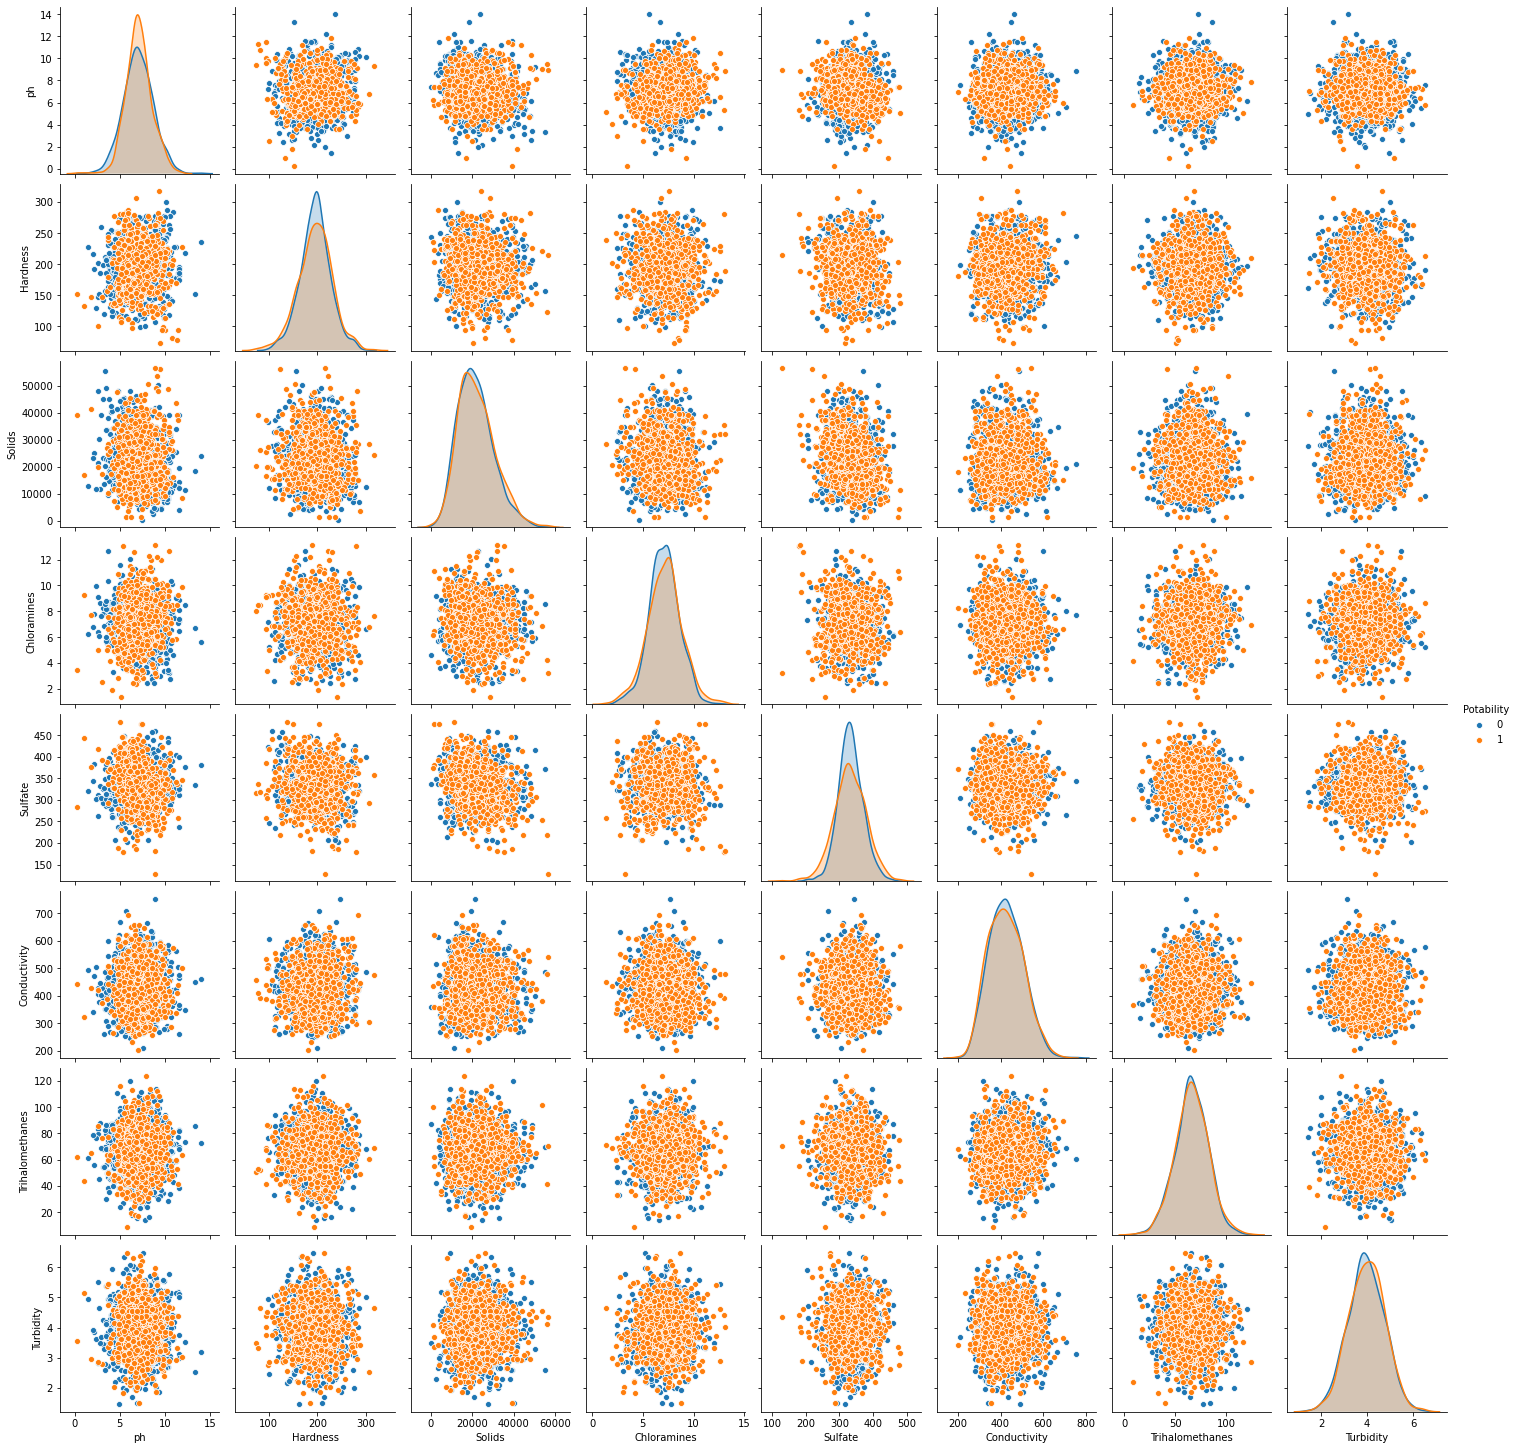

In [8]:
sns.pairplot(df_drop.loc[:, ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Trihalomethanes', 'Turbidity', 'Potability']], diag_kind='kde', hue='Potability')

In [9]:
df_drop.corr(method='pearson')

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.108948 -0.087615    -0.024768  0.010524   
Hardness         0.108948  1.000000 -0.053269    -0.022685 -0.108521   
Solids          -0.087615 -0.053269  1.000000    -0.051789 -0.162769   
Chloramines     -0.024768 -0.022685 -0.051789     1.000000  0.006254   
Sulfate          0.010524 -0.108521 -0.162769     0.006254  1.000000   
Conductivity     0.014128  0.011731 -0.005198    -0.028277 -0.016192   
Organic_carbon   0.028375  0.013224 -0.005484    -0.023808  0.026776   
Trihalomethanes  0.018278 -0.015400 -0.015668     0.014990 -0.023347   
Turbidity       -0.035849 -0.034831  0.019409     0.013137 -0.009934   
Potability       0.014530 -0.001505  0.040674     0.020784 -0.015303   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.014128        0.028375         0.018278  -0.035849   
Hardness             0.011731        0.013224        -0.015400  -0.034831   
Solids              -0.005198       -0.005484        -0.015668   0.019409   
Chloramines         -0.028277       -0.023808         0.014990   0.013137   
Sulfate             -0.016192        0.026776        -0.023347  -0.009934   
Conductivity         1.000000        0.015647         0.004888   0.012495   
Organic_carbon       0.015647        1.000000        -0.005667  -0.015428   
Trihalomethanes      0.004888       -0.005667         1.000000  -0.020497   
Turbidity            0.012495       -0.015428        -0.020497   1.000000   
Potability          -0.015496       -0.015567         0.009244   0.022682   

                 Potability  
ph                 0.014530  
Hardness          -0.001505  
Solids             0.040674  
Chloramines        0.020784  
Sulfate           -0.015303  
Conductivity      -0.015496  
Organic_carbon    -0.015567  
Trihalomethanes    0.009244  
Turbidity          0.022682  
Potability         1.000000

In [10]:
df_fill.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        15.769881     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        56.647656     3.439711     0.000000  
50%      421.884968       14.218338        66.396293     3.955028     0.000000  
75%      481.792304       16.557652        76.666609     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

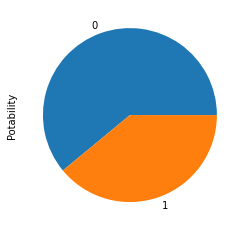

In [11]:
df_fill['Potability'].value_counts().plot.pie()

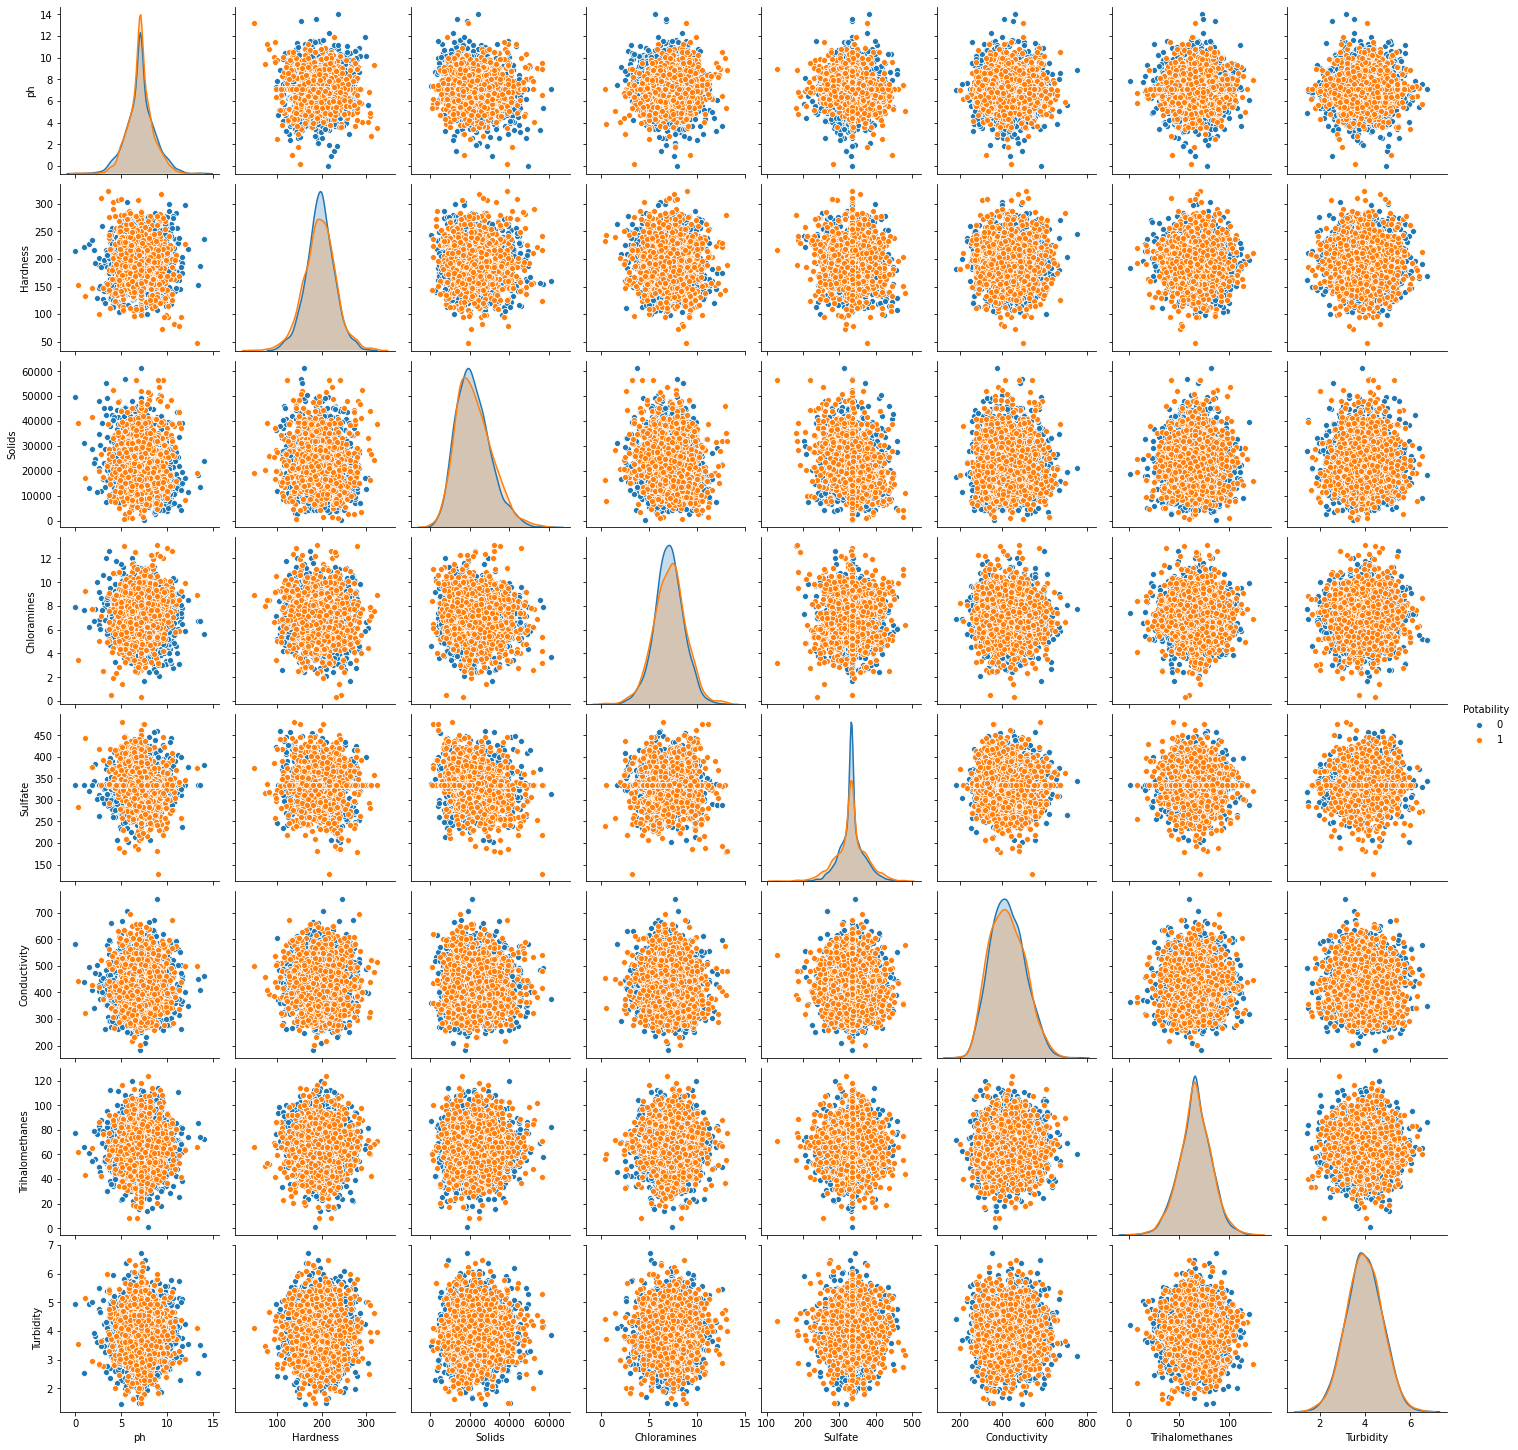

In [12]:
sns.pairplot(df_fill.loc[:, ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Trihalomethanes', 'Turbidity', 'Potability']], diag_kind='kde', hue='Potability')

In [13]:
df_fill.corr(method='pearson')

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.075833 -0.081884    -0.031811  0.014403   
Hardness         0.075833  1.000000 -0.046899    -0.030054 -0.092766   
Solids          -0.081884 -0.046899  1.000000    -0.070148 -0.149840   
Chloramines     -0.031811 -0.030054 -0.070148     1.000000  0.023791   
Sulfate          0.014403 -0.092766 -0.149840     0.023791  1.000000   
Conductivity     0.017192 -0.023915  0.013831    -0.020486 -0.014059   
Organic_carbon   0.040061  0.003610  0.010242    -0.012653  0.026909   
Trihalomethanes  0.002994 -0.012690 -0.008875     0.016627 -0.025605   
Turbidity       -0.036222 -0.014449  0.019546     0.002363 -0.009790   
Potability      -0.003287 -0.013837  0.033743     0.023779 -0.020619   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.017192        0.040061         0.002994  -0.036222   
Hardness            -0.023915        0.003610        -0.012690  -0.014449   
Solids               0.013831        0.010242        -0.008875   0.019546   
Chloramines         -0.020486       -0.012653         0.016627   0.002363   
Sulfate             -0.014059        0.026909        -0.025605  -0.009790   
Conductivity         1.000000        0.020966         0.001255   0.005798   
Organic_carbon       0.020966        1.000000        -0.012976  -0.027308   
Trihalomethanes      0.001255       -0.012976         1.000000  -0.021502   
Turbidity            0.005798       -0.027308        -0.021502   1.000000   
Potability          -0.008128       -0.030001         0.006960   0.001581   

                 Potability  
ph                -0.003287  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.020619  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.006960  
Turbidity          0.001581  
Potability         1.000000

Hay que escalar los datos ya que hay mucha diferencia entre sus unidades. En el caso de la red neuronal y el SVM ayudará a que funcionen mejor, sean más fáciles de entrenar y se evita preferencia por ciertas variables (también evita desbordamientos al hacer ciertas operaciones y otros problemas que nos hemos encontrado). En el caso del árbol de decisión el escalado de datos no es necesario por el algoritmo que se sigue para crearlo (independiente de unidades, atiende al coeficiente de Gini o a la entropía según los parámetros).

Analizando las gráficas vemos que algunas no siguen una distribucion normal del todo clara por lo que decidimos no realizar el estandarizado y decantarnos por el escalado.

### Operaciones sobre los datos

Hemos decidido usar el dataframe en el que se rellenaron los huecos con `NaN` ya que nos provee de mayor cantidad de ejemplos y por tanto más libertad para usarlos para entrenamiento, validación y test.

In [14]:
variables = df_fill.iloc[:, :df_fill.shape[1]-1]
salida = df_fill['Potability']

In [15]:
X = np.array(variables)
X

array([[9.13060724e+00, 2.26403741e+02, 1.99686778e+04, 5.72379157e+00,
        3.86699776e+02, 4.40543099e+02, 1.17517184e+01, 6.63962929e+01,
        5.28848679e+00],
       [5.67923412e+00, 1.88188696e+02, 3.56431812e+04, 8.88265371e+00,
        3.22169383e+02, 2.56302559e+02, 1.50002598e+01, 6.63962929e+01,
        2.33957274e+00],
       [8.08041524e+00, 1.66891700e+02, 1.81361289e+04, 6.86755296e+00,
        3.33775777e+02, 6.00937203e+02, 1.63077901e+01, 5.55861417e+01,
        4.07082429e+00],
       [7.89546925e+00, 1.54265780e+02, 7.76961612e+03, 7.20526204e+00,
        2.58312879e+02, 4.07732217e+02, 1.64200410e+01, 6.30160176e+01,
        4.23694730e+00],
       [6.44625203e+00, 2.04253563e+02, 1.11042505e+04, 7.64861289e+00,
        3.33775777e+02, 4.18041220e+02, 1.66256274e+01, 6.63962929e+01,
        4.97695786e+00],
       [4.18749081e+00, 2.08374188e+02, 2.18097098e+04, 5.84611204e+00,
        3.27474203e+02, 2.64508083e+02, 1.12351442e+01, 4.66825973e+01,
        4.5

In [16]:
y = np.array(salida)
y

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [17]:
escalador_X = MinMaxScaler()
escalador_X.fit(X)
X_escalada = escalador_X.transform(X)
X_escalada

array([[0.65218623, 0.64917278, 0.32258979, 0.42049249, 0.73203791,
        0.45301273, 0.36596622, 0.53267262, 0.72574906],
       [0.40565958, 0.51055778, 0.57994437, 0.66776154, 0.54872889,
        0.13083439, 0.49043141, 0.53267262, 0.16819299],
       [0.57717252, 0.43330855, 0.29250176, 0.51002372, 0.58169873,
        0.73349121, 0.54052836, 0.44497202, 0.49552359],
       [0.56396209, 0.38751135, 0.12229735, 0.53645887, 0.36733416,
        0.39563689, 0.54482916, 0.50524912, 0.52693275],
       [0.46044657, 0.56882885, 0.17704763, 0.57116344, 0.58169873,
        0.41366407, 0.55270603, 0.53267262, 0.66684777],
       [0.29910649, 0.58377533, 0.35281709, 0.43006748, 0.56379809,
        0.14518325, 0.34617411, 0.37273935, 0.59424453],
       [0.76959415, 0.4195374 , 0.6192535 , 0.5675301 , 0.62778693,
        0.51802925, 0.43396636, 0.53267262, 0.3365162 ],
       [0.50577104, 0.47389276, 0.5701127 , 0.57988472, 0.64790615,
        0.35001884, 0.58817555, 0.57092357, 0.43706432],


In [18]:
m = len(y)
input_size = X.shape[1]
num_labels = 2 #O es potable o no es potable

y_onehot = np.zeros((m, num_labels)) #Inicializamos a 0s

for i in range(m):
    y_onehot[i][y[i]] = 1 #Rellenamos con 1
    
y_onehot

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [19]:
X.shape, y.shape, X_escalada.shape, y_onehot.shape

((3276, 9), (3276,), (3276, 9), (3276, 2))

Ahora crearemos los distintos grupos de datos para entrenamiento, validación y test, siendo sus porcentajes 70, 15, 15 respectivamente.

Hemos decidido usar un 70% para entremaiento ya que cuantos más datos usemos para entrenar, teniendo en cuenta la complejidad del problema, mejor resultado obtendremos.

In [20]:
def division_datos(X, y):
    y.reshape(len(y), 1)
    X_train, X_30, y_train, y_30 = train_test_split(X, y, test_size = 0.3, random_state = 123)
    #Ahora subdividimos los datos de test X_30 e y_30 en validación y test (50% del 30%)
    X_val, X_test, y_val, y_test = train_test_split(X_30, y_30, test_size = 0.5, random_state = 123)
    return X_train, y_train, X_val, y_val, X_test, y_test

In [21]:
#Creación de los grupos para valores originales
X_train, y_train, X_val, y_val, X_test, y_test = division_datos(X, y)

#Creación de los grupos para valores escalados
X_train_esc, y_train2, X_val_esc, y_val2, X_test_esc, y_test2 = division_datos(X_escalada, y)

### Regresión logística

La primera técnica de aprendizaje que emplearemos es la regresión logística. Para ello utilizaremos las siguientes funciones, desarrolladas en prácticas pasadas:

In [103]:
def sigmoide_reg(Z):
    """Devuelve el sigmoide de Z"""
    return 1 / (1 + np.exp(-Z))

def coste_regularizado_reg(theta, X, Y, L):
    """Calcula el coste regularizado mediante su función matemática"""
    m = np.shape(X)[0]
    H = sigmoide_reg(X @ theta)
    sumando_1 = np.transpose(np.log(H)) @ Y
    sumando_2 = np.transpose(np.log(1 - H)) @ (1 - Y)
    sumando_3 = - ((sumando_1 + sumando_2) / m)
    sumando_4 = (L / (2*m)) * sum(H ** 2)
    return sumando_3 + sumando_4

def gradiente_regularizado_reg(theta, X, Y, L):
    """Calcula el gradiente regularizado mediante su función matemática"""
    m = np.shape(X)[0]
    H = sigmoide_reg(X @ theta)
    sumando_1 = (np.transpose(X) @ (H - Y)) / m
    sumando_2 = (L / m) * theta
    return sumando_1 + sumando_2

def predecir_regresion(X, clasificadores):
    """Predice la regresion a través de los clasificadores"""
    predicciones = {}
    Y_pred = []
    for i in range(m):
        for e in range(clasificadores.shape[0]):
            theta = clasificadores[e]
            etiqueta = e
            predicciones[etiqueta] = sigmoide_reg(X[i] @ np.transpose(theta))
        Y_pred.append(max(predicciones.items(), key=operator.itemgetter(1))[0])
    return Y_pred

def efectividad_prediccion(Y, Y_pred):
    return (np.sum((Y == np.array(Y_pred))) / m) * 100

def funcion_a_minimizar(theta, X, y, L):
    return coste_regularizado_reg(theta, X, y, L), gradiente_regularizado_reg(theta, X, y, L).ravel()

oneVsAll se encarga de entrenar a varios clasificadores por regresión logística, utilizando "reg" como valor de regularización. Devuelve una matriz donde la fila i−ésima corresponde al clasificador para la i−ésima clase 

In [23]:
def oneVsAll(X_one, y_one, num_etiquetas, reg):
    """
    devuelve el resultado en una matriz, donde
    la fila i−ésima corresponde al clasificador de la etiqueta i−ésima
    """
    clasificadores = np.zeros(shape=(num_etiquetas, 9))
    theta = np.zeros(np.shape(X_one)[1])
    for i in range(num_etiquetas):
        v_etiquetas = (y_one == i) * 1

        resultado = opt.fmin_tnc(func=coste_regularizado_reg, x0=theta, fprime=gradiente_regularizado_reg, args=(X_one, v_etiquetas, reg))
        clasificadores[i] = resultado[0]
    return clasificadores

In [24]:

efectividad_prediccion(y, predecir_regresion(X, oneVsAll(X, y, 2, 0.01)))

61.01953601953603

La eficacia del clasificador depende del valor de regularización. Por ello hemos desarrollado un bucle que itera distintos valores de "reg" para saber cual es el que obtiene mejores resultados.

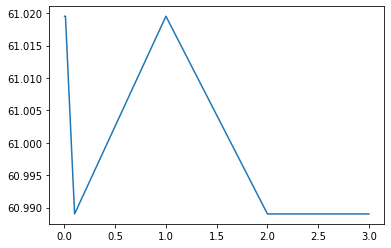

In [25]:
#Distintos valores de regularizacion:
num_entradas = 9
array_reg = [0.001, 0.01, 0.1, 1, 2, 3]
precisiones_log = []

for reg_val in array_reg:
    
    clasificadores_log = oneVsAll(X, y, 2, reg_val)
    
    precisiones_log.append(efectividad_prediccion(y, predecir_regresion(X, clasificadores_log)))

plt.plot(array_reg, precisiones_log)
plt.show()

Según se puede apreciar en la gráfica, la precisión varía entre 61.02 y 60.99. Para obtener el valor de regularización que proporciona una mayor precisión, buscaremos el valor más alto en precisiones_log.

In [26]:
max_prec_log = 0
max_reg_log = -1 
for i in range(0, len(array_reg)):
    if precisiones_log[i] > max_prec_log:
        max_prec_log = precisiones_log[i]
        max_reg_log = array_reg[i]        
        
print("El mayor porcentaje de acierto del modelo es:",  max_prec_log, "cuando el valor de regularizacion es:", max_reg_log)

El mayor porcentaje de acierto del modelo es: 61.01953601953603 cuando el valor de regularizacion es: 0.001


Ejecutando este apartado, concluimos que con un valor de regularización de 0.001 obtenemos la precisión máxima, la cual es de 61.02%. Esta precisión no es suficientemente alta, por lo que probaremos otras técnicas en busca de mejores resultados.

In [177]:
def evaluacion_error(X, y, Xval, yval, L):
    n = X.shape[1]
    entrenamiento =  []
    evaluacion = []
    for i in range(7,102):
        thetas_min = opt.minimize(fun=funcion_a_minimizar, x0=np.zeros(n), args=(X[0:i], y[0:i], L), method='TNC', jac=True).x
        
        entrenamiento.append(coste_regularizado_reg(thetas_min, X[0:i], y[0:i], 0))
        evaluacion.append(coste_regularizado_reg(thetas_min, Xval, yval, 0))
    
    return entrenamiento, evaluacion

In [178]:
ent, eva = evaluacion_error(X, y, X_val_esc, y_val2, 0.001)

In [179]:
puntos_ent = np.linspace(6,100,95)
puntos_eva = np.linspace(6,100,95)

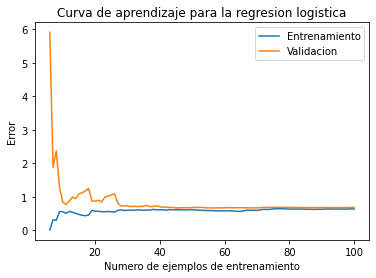

In [182]:
plt.title("Curva de aprendizaje para la regresion logistica")
plt.xlabel("Numero de ejemplos de entrenamiento")
plt.ylabel("Error")
plt.plot(puntos_ent, ent, label='Entrenamiento')
plt.plot(puntos_eva, eva, label='Validacion')
plt.legend()

### Redes neuronales

La siguiente tecnica que utilizaremos será la de red neuronal. Para ello, al igual que con la regresión logística, utilizaremos las siguientes funciones desarrolladas en prácticas pasadas:

##### Funciones auxiliares

In [27]:
def sigmoide(Z):
    """Devuelve el sigmoide de Z"""
    return 1 / (1 + np.exp(-Z))

In [28]:
def forward_propagate(X, Theta1, Theta2):
    """Realiza la propagación hacia delante de los elementos de X a través de Theta1 y Theta2"""
    m = X.shape[0]
    
    A1 = np.hstack((np.ones((m, 1)), X))
    A2 = np.hstack((np.ones((m, 1)), sigmoide(A1 @ Theta1.T)))
    H = sigmoide(A2 @ Theta2.T)
    return A1, A2, H

In [29]:
def coste(X, y, H, num_tipos):
    """Calcula el coste sin regularizar"""
    m = X.shape[0]
    
    sumAux = 0
    for i in range(num_tipos):
        sumAux = sumAux + (np.log(H[:,i]).T @ -y[:,i]) - ((1-np.ravel(y[:,i])) @ np.log(1-H[:,i]))
    
    return sumAux / m 

In [30]:
def coste_regularizado(X, coste, Theta1, Theta2, reg):
    """El coste regularizado se obtiene mediante el coste y la fórmula con reg"""
    m = X.shape[0]
    
    return coste + (reg / (2 * m)) * (np.sum(Theta1[:, 1:]**2) + np.sum(Theta2[:, 1:]**2))

In [31]:
def gradiente(X, y, Theta1, Theta2, reg):
    """Cálculo del descenso del gradiente atendiendo al factor de regularización reg"""
    m = X.shape[0]
    Delta1 = np.zeros((Theta1.shape))
    Delta2 = np.zeros((Theta2.shape))
    A1, A2, H = forward_propagate(X, Theta1, Theta2)
    for t in range(m):
        a1t = A1[t, :]
        a2t = A2[t, :]
        ht = H[t, :]
        yt = y[t]
        d3t = ht - yt
        d2t = np.dot(Theta2.T, d3t) * (a2t * (1 - a2t))
        Delta1 = Delta1 + np.dot(d2t[1:, np.newaxis], a1t[np.newaxis, :])
        Delta2 = Delta2 + np.dot(d3t[:, np.newaxis], a2t[np.newaxis, :])
    
    Delta1_reg = (Delta1/m) + (reg/m) * np.hstack((np.zeros((Theta1.shape[0], 1)), Theta1[:, 1:]))
    Delta2_reg = (Delta2/m) + (reg/m) * np.hstack((np.zeros((Theta2.shape[0], 1)), Theta2[:, 1:]))
    
    return np.append(Delta1_reg, Delta2_reg)  

In [32]:
def backprop(params_rn, X, y, num_tipos, num_neuronas, num_entradas, reg):
    """Función encargada de calcular el coste y gradiente"""
    Theta1 = params_rn[:(num_neuronas * (num_entradas+1))].reshape(num_neuronas, num_entradas + 1)
    Theta2 = params_rn[(num_neuronas * (num_entradas+1)):].reshape(num_tipos, num_neuronas + 1)
        
    A1, A2, H = forward_propagate(X, Theta1, Theta2)
    
    cost = coste(X, y, H, num_tipos)
    cost_regularizado = coste_regularizado(X, cost, Theta1, Theta2, reg)

    gradient = gradiente(X, y, Theta1, Theta2, reg)
    
    return cost_regularizado, gradient

In [33]:
def random_init(num_tipos, num_neuronas, num_entradas):
    """Función que inicializa los Thetas a valores random entre -0.12 y 0.12"""
    C = 0.12
    Theta1 = np.random.rand(num_neuronas, num_entradas + 1) * (2 * C) - C
    Theta2 = np.random.rand(num_tipos, num_neuronas + 1) * (2 * C) - C
    return (Theta1, Theta2)

In [34]:
def concat_thetas(Theta1, Theta2):
    return np.append(Theta1.flatten(), Theta2.flatten())

In [35]:
def crear_onehot(y_train, y_test):
    """Inicializa el onehot de entrenamiento y test"""
    y_onehot_train = np.zeros((y_train.shape[0], num_tipos)) #Inicializamos a 0s
    y_onehot_test = np.zeros((y_test.shape[0], num_tipos)) #Inicializamos a 0s
    for i in range(y_train.shape[0]):
        y_onehot_train[i][y_train[i]] = 1 #Rellenamos con 1
    for i in range(y_test.shape[0]):
        y_onehot_test[i][y_test[i]] = 1 #Rellenamos con 1
    return y_onehot_train, y_onehot_test

In [36]:
def calcular_aciertos(fmin, X, y, num_tipos, num_neuronas, num_entradas):
    """Devuelve la precisión de la red"""
    Theta1_aux = np.reshape(fmin.x[:(num_neuronas * (num_entradas + 1))], (num_neuronas, (num_entradas + 1)))
    Theta2_aux = np.reshape(fmin.x[-((num_neuronas + 1) * num_tipos):], (num_tipos, (num_neuronas + 1)))
    H = forward_propagate(X, Theta1_aux, Theta2_aux)[2]
    
    return predecir_redes(y, H)

In [37]:
def predecir_redes(y, y_pred):
    """Función auxiliar para devolver la precisión"""
    y_max = np.argmax(y_pred, axis = 1)
    suma = sum(y_max == y)
    return ((suma / np.shape(y_pred)[0])*100)

In [38]:
def devolver_resultados(fmin, X, y, num_tipos, num_neuronas, num_entradas):
    """Devuelve las predicciones de la red"""
    Theta1_aux = np.reshape(fmin.x[:(num_neuronas * (num_entradas + 1))], (num_neuronas, (num_entradas + 1)))
    Theta2_aux = np.reshape(fmin.x[-((num_neuronas + 1) * num_tipos):], (num_tipos, (num_neuronas + 1)))
    H = forward_propagate(X, Theta1_aux, Theta2_aux)[2]
    y_max = np.argmax(H, axis = 1)
    return y_max

In [39]:
def entrenar_red(X_train, y_train, X_test, y_test, num_tipos, num_neuronas, num_entradas, num_iteraciones, Theta1, Theta2, 
                 reg):
    """Entrena la red y devuelve la precisión"""
    y_onehot_train, y_onehot_test = crear_onehot(y_train, y_test)
    
    params_rn = concat_thetas(Theta1, Theta2)
    #params_rn = np.append(Theta1[:num_neuronas, :].flatten(), Theta2[:num_tipos, :(num_neuronas+1)].flatten())
    
    fmin = opt.minimize(fun=backprop, x0=params_rn, args=(X_train, y_onehot_train, num_tipos, 
        num_neuronas, num_entradas, reg), method='TNC', jac=True, options={'maxiter': num_iteraciones})
    
    resultado = calcular_aciertos(fmin, X_test, y_test, num_tipos, num_neuronas, num_entradas)
    return resultado

In [40]:
def entrenar_red_resultado(X_train, y_train, X_test, y_test, num_tipos, num_neuronas, num_entradas, num_iteraciones, Theta1, Theta2, 
                 reg):
    
    """Entrena la red y devuelve las predicciones"""
    y_onehot_train, y_onehot_test = crear_onehot(y_train, y_test)
    
    params_rn = concat_thetas(Theta1, Theta2)
    #params_rn = np.append(Theta1[:num_neuronas, :].flatten(), Theta2[:num_tipos, :(num_neuronas+1)].flatten())
    
    fmin = opt.minimize(fun=backprop, x0=params_rn, args=(X_train, y_onehot_train, num_tipos, 
        num_neuronas, num_entradas, reg), method='TNC', jac=True, options={'maxiter': num_iteraciones})
    print(X_test.shape)
    return devolver_resultados(fmin, X_test, y_test, num_tipos, num_neuronas, num_entradas)

Para dibujar la matriz de confusión utilizaremos la siguiente función sacada de sklearn.metrics.

In [41]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Para probar la red establecemos el número de neuronas de la capa oculta en 25. El tamaño de theta 1 es 25 x 10, siendo 10 el numero de variables (9) + 1. El tamaño de theta2 es 2x26, siendo 2 el número de posibles salidas y 26 las neuronas de la capa oculta más 1.

Utilizaremos como pesos dos arrays inicializados a valores aleatorios entre -0.12 y 0.12 y los concatenaremos para obtener la variable params_rn y 0.1 como valor de regularización.

In [42]:
num_entradas = 9
num_neuronas = 25
num_tipos = 2
num_iteraciones = 100
reg = 0.1
# Theta1 es de dimensión 25 x 10
# Theta2 es de dimensión 2 x 26
Theta1, Theta2 = random_init(num_tipos, num_neuronas, num_entradas)
resultado = entrenar_red(X_train_esc, y_train2, X_val_esc, y_val2, num_tipos, num_neuronas, num_entradas, num_iteraciones,
                         Theta1,Theta2,reg)

print("La precisión de la red neuronal para λ = 0.1 es del ", resultado, "%")

La precisión de la red neuronal para λ = 0.1 es del  67.20977596741345 %


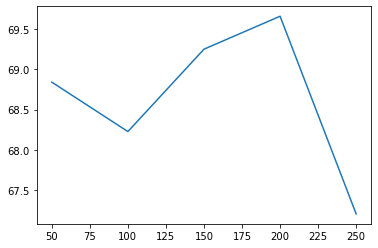

In [47]:
#Distintos valores de neuronas:
num_entradas = 9
array_neur = [50, 100, 150, 200, 250]
num_tipos = 2
num_iteraciones = 200
reg = 0.1
precisiones_neur = []

for neur in array_neur:
    
    Theta1, Theta2 = random_init(num_tipos, neur, num_entradas)
    
    precisiones_neur.append(entrenar_red(X_train_esc, y_train2, X_val_esc, y_val2, num_tipos, neur, num_entradas, 
                                         num_iteraciones, Theta1, Theta2, reg))

plt.plot(array_neur, precisiones_neur)
plt.show()

In [44]:
precisiones_neur[3]

68.63543788187373

Como podemos observar en la gráfica, hemos obtenido la precisión máxima (68.63%) con 200 neuronas.

A continuación iteraremos el valor de Lambda:

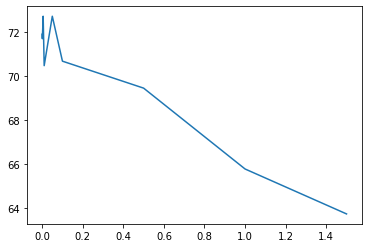

In [48]:
#Distintos valores de lambda:
num_entradas = 9
num_neuronas = 50
num_tipos = 2
num_iteraciones = 200
array_lambda = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 1.5]
precisiones_lambda = []

Theta1, Theta2 = random_init(num_tipos, num_neuronas, num_entradas)

for lamb in array_lambda:
    precisiones_lambda.append(entrenar_red(X_train_esc, y_train2, X_val_esc, y_val2, num_tipos, num_neuronas, num_entradas, 
                                      num_iteraciones, Theta1, Theta2, lamb))

plt.plot(array_lambda, precisiones_lambda)
plt.show()

In [49]:
np.argmax(precisiones_lambda)

2

In [50]:
precisiones_lambda[2]

71.69042769857434

En este caso, la precisión máxima (71.69%) la hemos obtenido con un valor de 0.005 de lambda.

Por último cambiaremos el número de iteraciones:

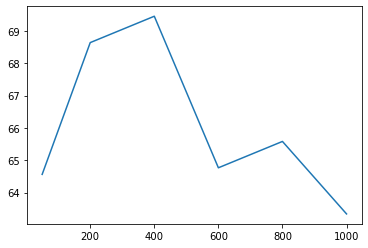

In [54]:
#Distintos valores de iteraciones:
num_entradas = 9
num_neuronas = 50
num_tipos = 2
array_it = [50, 200, 400, 600, 800, 1000]
reg = 0.005
precisiones_it = []

Theta1, Theta2 = random_init(num_tipos, num_neuronas, num_entradas)

for it in array_it:
    precisiones_it.append(entrenar_red(X_train_esc, y_train2, X_val_esc, y_val2, num_tipos, num_neuronas, num_entradas, 
                                      it, Theta1, Theta2, reg))

plt.plot(array_it, precisiones_it)
plt.show()

In [55]:
precisiones_it[2]

69.4501018329939

La mejor precisión (69.45) se obtiene cuando se itera 400 veces.

Ejecutamos la red con los valores obtenidos:

In [56]:
#Mejores valores provisionales:
num_entradas = 9
num_neuronas = 200
num_tipos = 2
num_iteraciones = 400
reg = 0.005

Theta1, Theta2 = random_init(num_tipos, num_neuronas, num_entradas)

precision = entrenar_red(X_train_esc, y_train2, X_test_esc, y_test2, num_tipos, num_neuronas, num_entradas, num_iteraciones,
                         Theta1, Theta2, reg)

print("La precisión de la red neuronal para λ =",  str(reg) + ",", num_iteraciones, "iteraciones y", num_neuronas, "neuronas es del ", resultado, "%")

La precisión de la red neuronal para λ = 0.005, 400 iteraciones y 200 neuronas es del  67.20977596741345 %


Los anteriores bucles cambiaban solo una de las 3 variables, teniendo siempre un mismo valor genérico del resto. Debido a esto hemos decidido crear un bucle que itere los 3 valores de forma anidada. Este fragmento tardará varias horas en ejecutarse pero nos dará los valores de las variables que mejor precisión obtengan.

In [34]:
num_entradas = 9
array_neur = [50, 100, 150, 200, 250]
array_lambda = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 1.5]
array_it = [50, 200, 400, 600, 800, 1000]
num_tipos = 2
precisiones = []
i = j = 0

for neur in array_neur:
    Theta1_def, Theta2_def = random_init(num_tipos, neur, num_entradas)
    precisiones.append([])
    
    for lamb in array_lambda:
        precisiones[i].append([])
        
        for it in array_it:
            precisiones[i][j].append(entrenar_red(X_train_esc, y_train2, X_val_esc, y_val2, num_tipos, neur, num_entradas, 
                                         it, Theta1_def, Theta2_def, lamb))
        j += 1
    i += 1
    j = 0

<ipython-input-23-54f2b82b075f>:7: RuntimeWarning: divide by zero encountered in log
  sumAux = sumAux + (np.log(H[:,i]).T @ -y[:,i]) - ((1-np.ravel(y[:,i])) @ np.log(1-H[:,i]))
<ipython-input-23-54f2b82b075f>:7: RuntimeWarning: invalid value encountered in matmul
  sumAux = sumAux + (np.log(H[:,i]).T @ -y[:,i]) - ((1-np.ravel(y[:,i])) @ np.log(1-H[:,i]))


In [36]:
mejor_precision = 0
mejor_neur = mejor_lambda = mejor_it = -1
for a in range(5):
    for b in range(9):
        for c in range(6):
            if(precisiones[a][b][c] > mejor_precision):
                mejor_precision = precisiones[a][b][c]
                mejor_neur = array_neur[a]
                mejor_lambda = array_lambda[b]
                mejor_it = array_it[c]
print("Los valores que mejor precision dan son:", "\nNumero de neuronas:", mejor_neur, "\nLambda:", mejor_lambda,
      "\nNumero de iteraciones:", mejor_it, "\nPrecision:", mejor_precision)

Los valores que mejor precision dan son: 
Numero de neuronas: 150 
Lambda: 0.005 
Numero de iteraciones: 400 
Precision: 69.4501018329939


In [41]:
num_entradas = 9
num_tipos = 2
Theta1_def, Theta2_def = random_init(num_tipos, 150, num_entradas)
print(entrenar_red(X_train_esc, y_train2, X_val_esc, y_val2, num_tipos, 150 , num_entradas, 
                                         400, Theta1_def, Theta2_def, 0.005))

67.20977596741345


In [42]:
#Theta1_def, Theta2_def = random_init(num_tipos, 150, num_entradas)
entrenar_red(X_train_esc, y_train2, X_test_esc, y_test2, num_tipos, 150 , num_entradas, 
                                         400, Theta1_def, Theta2_def, 0.005)

65.85365853658537

In [43]:
#Theta1_def, Theta2_def = random_init(num_tipos, 150, num_entradas)
resultado = entrenar_red_resultado(X_train_esc, y_train2, X_test_esc, y_test2, num_tipos, 150 , num_entradas, 
                                         400, Theta1_def, Theta2_def, 0.005)

(492, 9)


In [44]:
print(classification_report(y_test2, resultado, target_names = ["No potable", "Potable"]))

              precision    recall  f1-score   support

  No potable       0.68      0.83      0.74       296
     Potable       0.61      0.40      0.48       196

    accuracy                           0.66       492
   macro avg       0.64      0.62      0.61       492
weighted avg       0.65      0.66      0.64       492



Confusion matrix, without normalization
[[245  51]
 [117  79]]


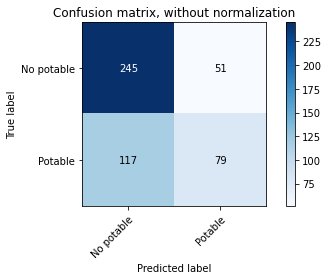

In [45]:
plot_confusion_matrix(y_test2, resultado, ["No potable", "Potable"], normalize = False)

### Medidas de rendimiento
Precisión: VP/(VP+FP)

Recall: VP/(VP+FN) = VP/P

Medida F1(media armonica de precision y recall) = (Precision * Recall)/(Precision + Recall) 

#### No potable

Precisión = 245/(245+117)*100 = 68%

Recall = 245/(245 + 51)*100 = 82%

Medida F1 = (68 * 82)/(68 + 82) = 37%

#### Potable

Precisión = 79/(79+51)*100 = 61%

Recall = 79/(79 + 117)*100 = 40%

Medida F1 = (68 * 82)/(68 + 82) = 24%

TODO Ejecutar algoritmo largo y comentar resultados

### Support Vector Machines

Las SVMs o Support Vector Machines son otro de los algoritmos de Inteligencia Artificial que hemos dado a lo largo de la asignatura, hasta la aparición del Deep Learning eran uno de los algoritmos más utilizados y a pesar de no tener una gran complejidad pueden llegar a proporcionar un porcentaje de acierto muy elevado en algunos casos. 

En la práctica 6 mostrábamos gráficamente la distribución de los puntos, sin embargo, en este caso no podemos hacerlo ya que estamos ante un problema con 9 variables de entrada imposible de representar.

Sí que se pueden mostrar las relaciones entre variables 2 a 2, cosa que hicimos más arriba durante el análisis de los datos.

In [46]:
#Lo configuramos para usar kernel gausiano
svm1 = SVC(kernel = 'rbf', C = 1, gamma = 1 / (2 * 1 **2)) #C = 1, sigma = 1
svm1.fit(X_train_esc, y_train2)

precision = accuracy_score(y_val2, svm1.predict(X_val_esc))
precision

0.6252545824847251

In [47]:
svm2 = SVC(kernel = 'rbf', C = 1, gamma = 1 / (2 * 1 **2)) #C = 1, sigma = 1
svm2.fit(X_train, y_train)

precision = accuracy_score(y_val, svm2.predict(X_val))
precision

0.6252545824847251

Con esta configuración inicial obtenemos un porcentaje de acierto del 62,52% sobre los datos de validación escalados y lo mismo con los que están sin escalar. No siempre tiene que ocurrir esto ya que los SVM a veces se ven afectados por las escalas de los datos. Para demostrar plenamente que es mejor escalar en el caso de los SVM haría falta un análisis más profundo que una simple ejecución. De todas maneras a partir de ahora usaremos los datos escalados.

Creemos que se puede llegar a un valor algo mayor que se aleje más del 50% que sería como responder aleatoriamente así que optimizaremos los valores de C y sigma.

In [48]:
def select_C_sigma(X, y, X_val, y_val):
    C_vec = [0.001, 0.01, 0.1, 1, 10, 100]
    sigma_vec = [0.0001, 0.001, 0.01, 0.1, 1, 10]
    scores = np.zeros((len(C_vec), len(sigma_vec)))
    mejor_svm = None
    mejor_precision = 0
    for cont_C in range(len(C_vec)):
        C = C_vec[cont_C]
        for sigma_C in range(len(sigma_vec)):
            sigma = sigma_vec[sigma_C]
            svm = SVC(kernel = 'rbf', C = C, gamma = 1 / (2 * sigma **2))
            svm.fit(X, y.ravel())
            precision = accuracy_score(y_val, svm.predict(X_val))
            scores[cont_C, sigma_C] = precision
            if precision > mejor_precision:
                mejor_precision = precision
                mejor_svm = svm
    return scores, mejor_svm, mejor_precision

In [49]:
select_C_sigma(X_train_esc, y_train2, X_val_esc, y_val2)

(array([[0.62525458, 0.62525458, 0.62525458, 0.62525458, 0.62525458,
         0.62525458],
        [0.62525458, 0.62525458, 0.62525458, 0.62525458, 0.62525458,
         0.62525458],
        [0.62525458, 0.62525458, 0.62525458, 0.62525458, 0.62525458,
         0.62525458],
        [0.62525458, 0.62525458, 0.62525458, 0.64358452, 0.62525458,
         0.62525458],
        [0.62525458, 0.62525458, 0.62525458, 0.61303462, 0.66191446,
         0.62525458],
        [0.62525458, 0.62525458, 0.62525458, 0.61303462, 0.67413442,
         0.62525458]]),
 SVC(C=100, gamma=0.5),
 0.6741344195519349)

Al ver los datos se pueden deducir varias cosas, si el valor de C es demasiado pequeño sigma no influye y al revés ocurre igual. También vemos que el valor de precisión del que partíamos (62,52%) se ha visto incrementado un poco gracias a esta optimización hasta un 67,41%.

In [50]:
#Test del SVM
svm3 = SVC(kernel = 'rbf', C = 10, gamma = 1 / (2 * 1 **2)) #C = 10, sigma = 1
svm3.fit(X_train_esc, y_train2)

precision = accuracy_score(y_test2, svm3.predict(X_test_esc))
precision

0.6585365853658537

Sobre los datos de test la precisión baja un poco ya que quizás contenga algunos datos que se salen de la generalización que ha hecho el SVM pero tenemos más o menos un valor parecido y lo más importante, mayor al que teníamos antes de optimizar.

### Árboles de decisión

Como adición a los algoritmos de IA que hemos utilizado a lo largo del Notebook queremos añadir otro que no hemos dado en esta asignatura pero sí en IA2.

Hemos elegido añadir como extra los árboles de decisión ya que los datos favorecen su uso (clasificación solo entre 2 clases) y además son muy visuales y entendibles, cuanta más saturación tenga el color de un nodo más proporción de elementos tendrá el nodo de una clase sobre la otra. No son una caja negra como pueden ser las redes neuronales o los SVM previamente mostrados.

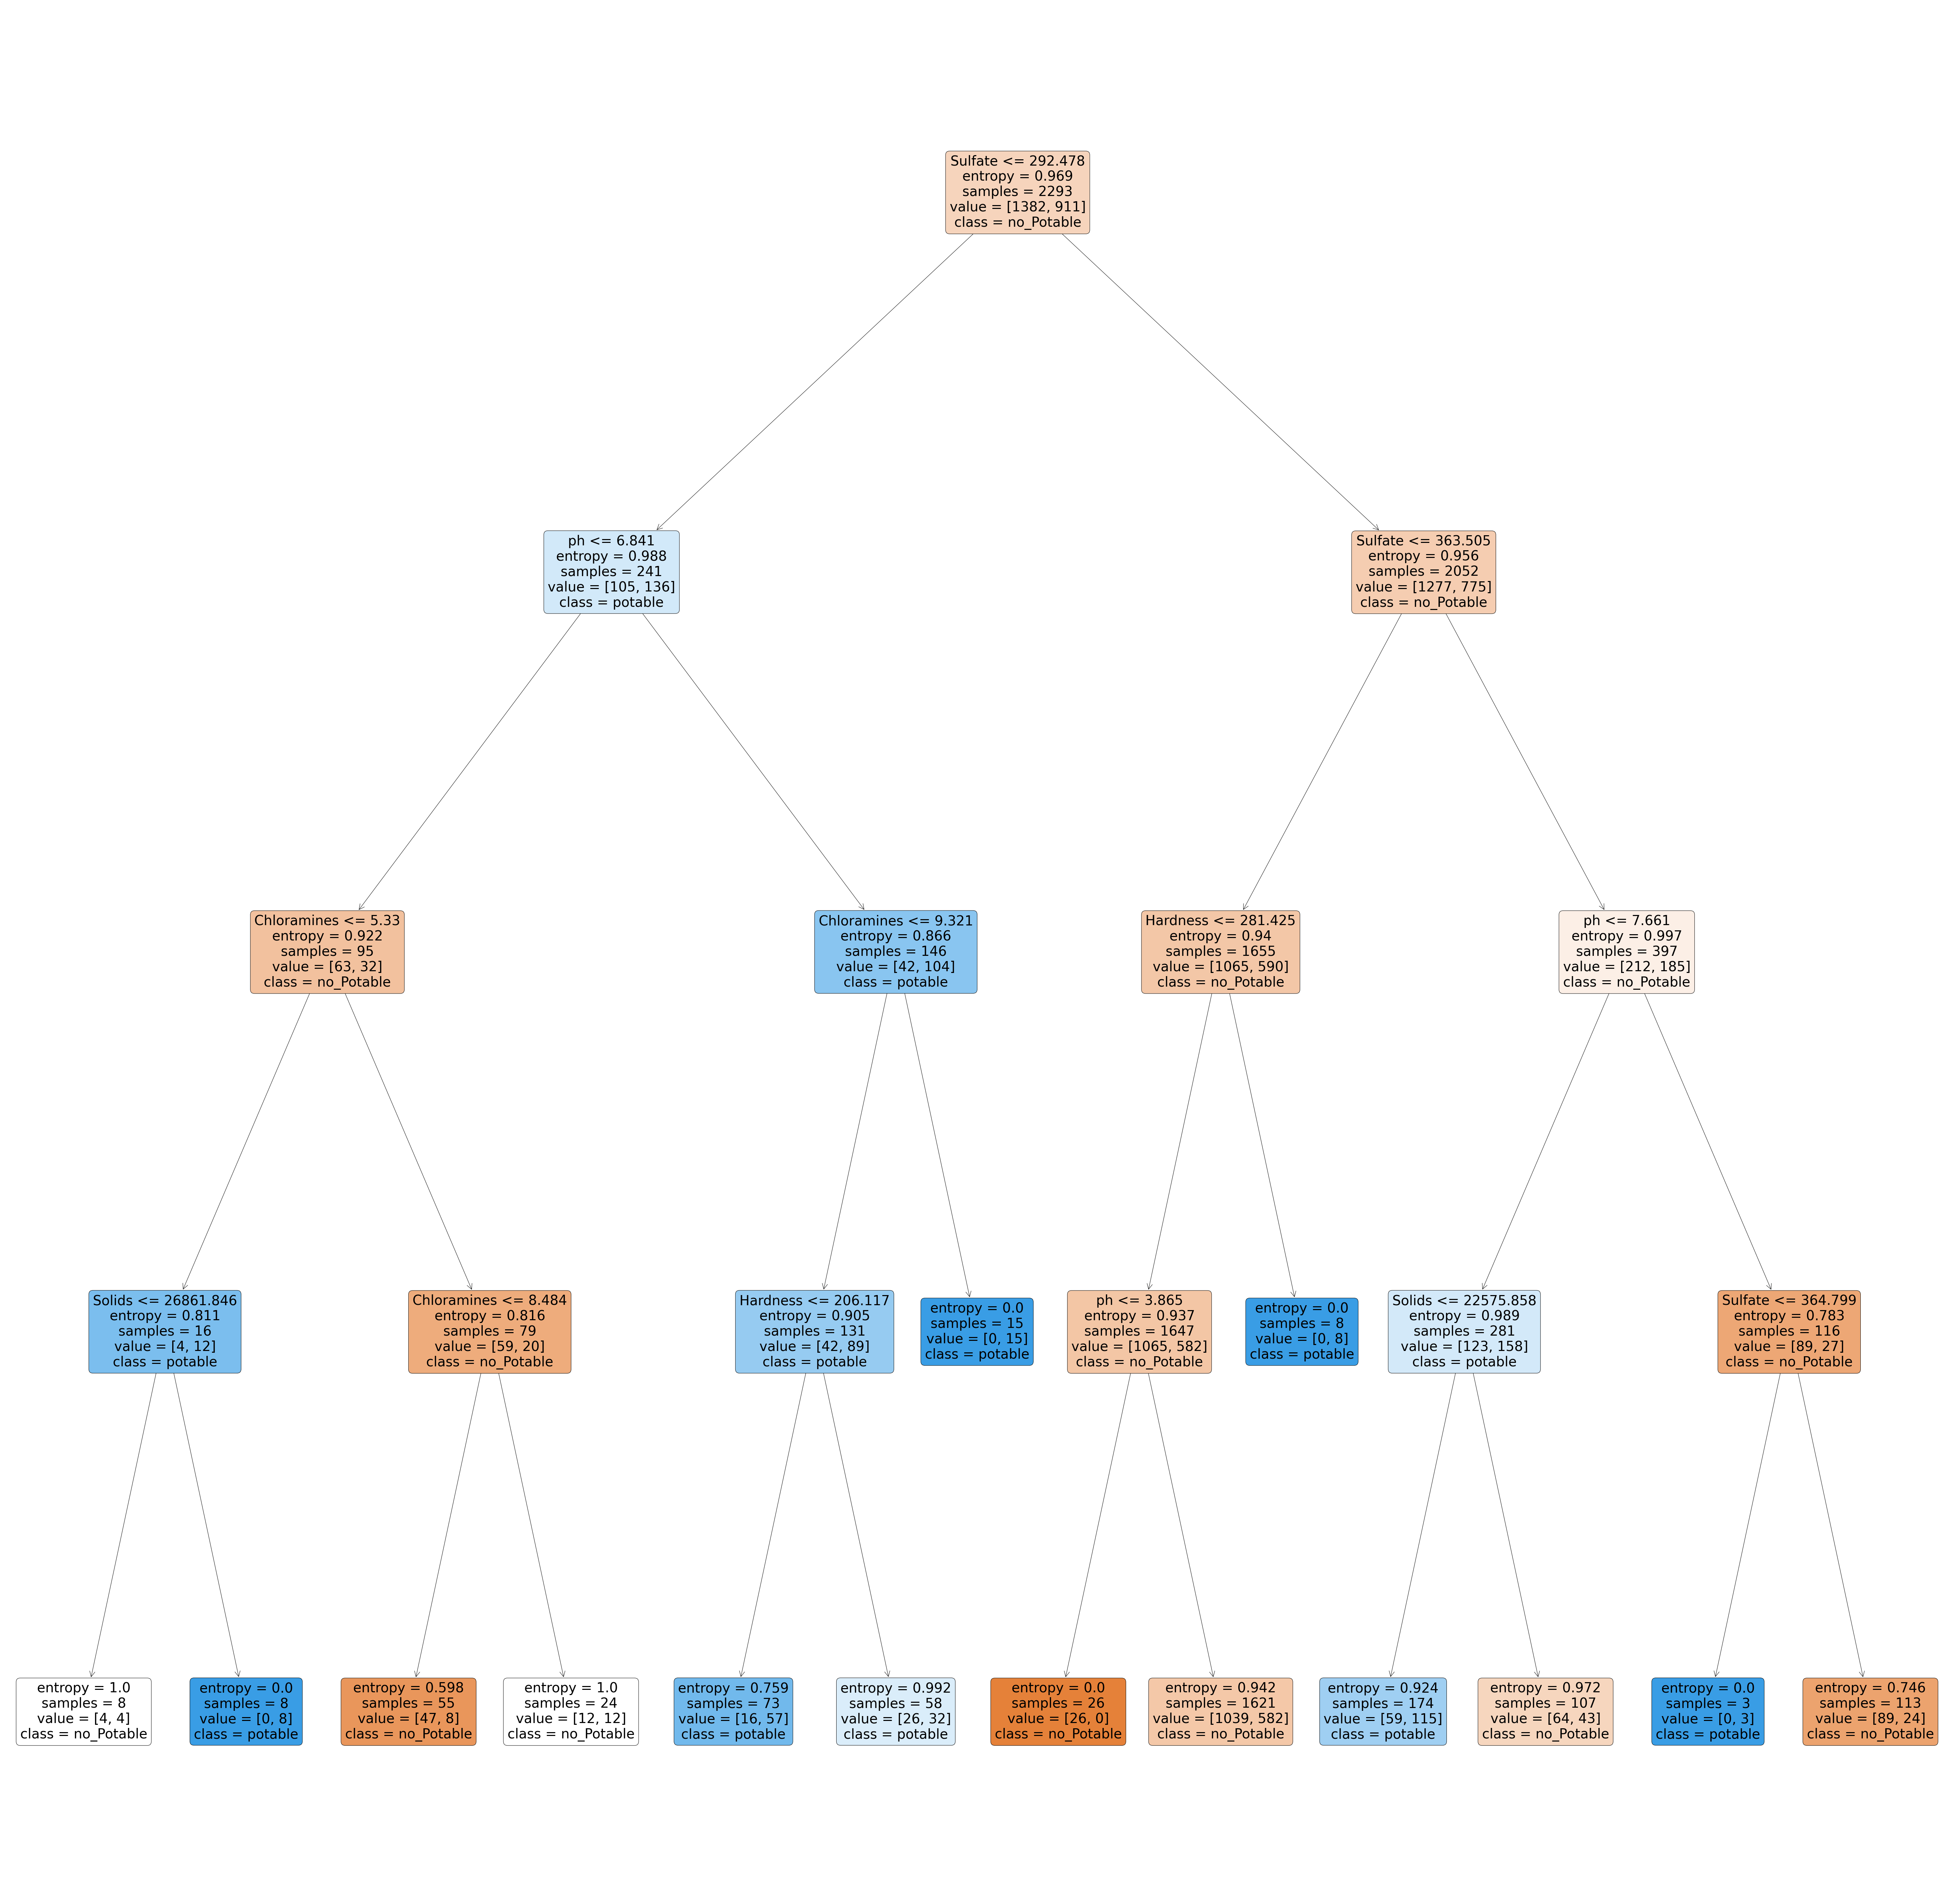

In [52]:
target_values = ['no_Potable', 'potable'] #Las 2 clases entre las que distinquimos

#Creamos y entrenamos el clasificador de árboles de decision configurado para usar la entropía como criterio de selección
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth = 4, random_state = 123)
clf1 = clf1.fit(X_train, y_train) #Usamos los datos sin escalar

#Mostramos el árbol obtenido
plt.figure(figsize=(100, 100)) #, dpi = 50)
plot_tree(clf1, filled=True, feature_names=df.columns, class_names=target_values, rounded=True)
plt.show()

En este arbol solo hemos puesto profundidad 4 para que se pueda apreciar la manera en la que funciona el algoritmo.

Su objetivo, en este caso, es minimizar la entropía, por lo que va eligiendo las variables que mejor separan cada grupo, cuanto más arriba salgan mejores son para ello. Por esto podemos afirmar que `Sulfate`, `pH`, `Chloramines` y `Hardness`, en ese orden, son las más importantes.

En muchos de los nodos hoja están bastante bien separados los elementos de cada clase (salvo en los que son más blanquecinos), sin embargo, estos nodos contienen todos bastante pocos elementos. El problema es que encontramos uno con 1600 elementos aproximadamente (el 9º, de color anaranjado), teniendo en cuenta que partimos de una base de 2300 elementos en el grupo de entrenamiento es mucho. Esto demuestra que nos encontramos ante un problema de gran dificultad ya que apenas conseguimos distinguir elementos tras 4 niveles de preguntas.

A continuación mostramos el árbol completo que separa las 2 clases a la perfección.

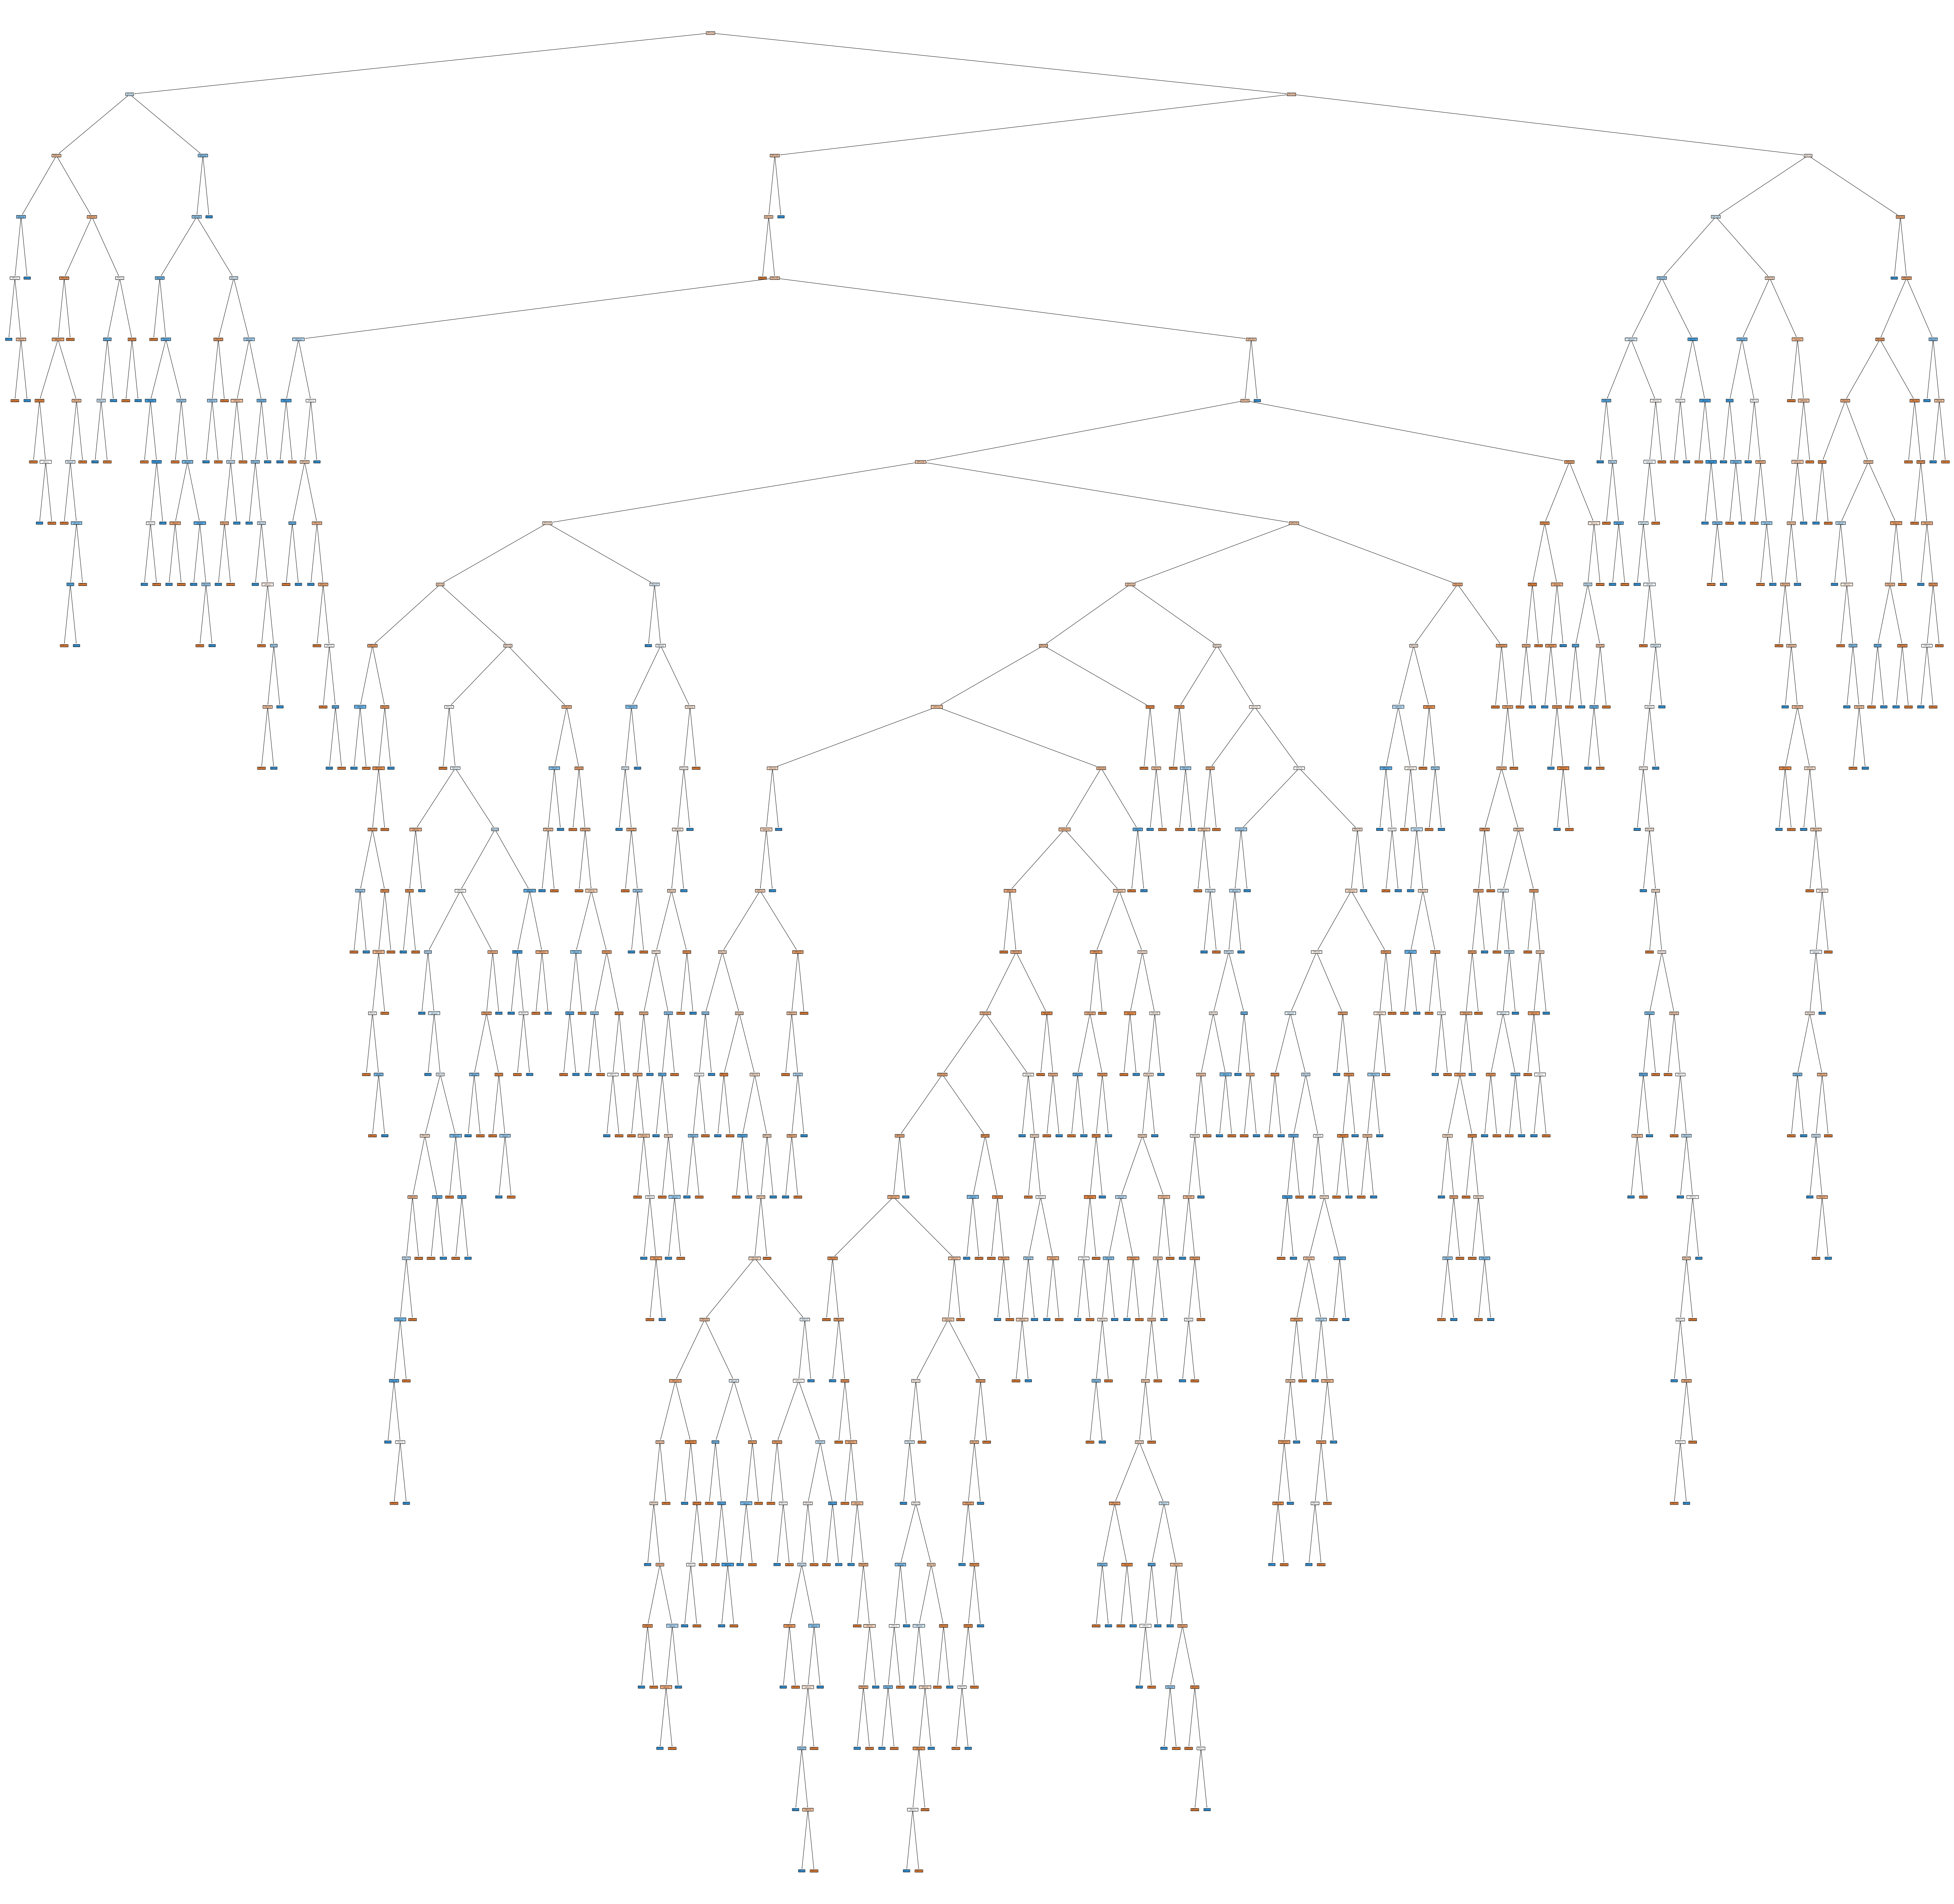

In [53]:
clf2 = DecisionTreeClassifier(criterion='entropy', random_state = 123)
clf2 = clf2.fit(X_train, y_train)

plt.figure(figsize=(100, 100))
plot_tree(clf2, filled=True, feature_names=df.columns, class_names=target_values, rounded=True)
plt.show()

In [54]:
clf2.get_depth()

30

En este caso tanto el gráfico como el valor mostrado hablan por sí solos. De nuevo queda demostrado que nos encontramos ante un problema de gran dificultad ya que para que un árbol de decisión alcance la cifra de 30 niveles hace falta una base de datos con relaciones mínimas.

Aunque el objetivo que teníamos al añadir los árboles de decisión era el de mostrar visualmente la dificultad de clasificar los datos tmabién se puede optimizar el número de niveles para maximizar la tasa de aciertos.

In [55]:
entrenamiento = []
test = []

#Para poder hacer una clasificación perfecta ha necesitado 37 niveles, pero nosotros pondremos 10 como límite
for i in range(1, 11): 
    clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = i, random_state = 123)
    clf = clf.fit(X_train, y_train)
    
    sol1 = accuracy_score(y_train, clf.predict(X_train))
    sol2 = accuracy_score(y_val, clf.predict(X_val))
    
    entrenamiento.append(sol1)
    test.append(sol2)

In [56]:
entrenamiento

[0.6162232882686437,
 0.6297426951591801,
 0.651984300043611,
 0.6624509376362844,
 0.6838203227213258,
 0.6921064108155255,
 0.703881378107283,
 0.7174007849978195,
 0.7296118621892717,
 0.7409507195813345]

In [57]:
test

[0.6109979633401222,
 0.6334012219959266,
 0.6558044806517311,
 0.6558044806517311,
 0.659877800407332,
 0.6334012219959266,
 0.6476578411405295,
 0.6415478615071283,
 0.6415478615071283,
 0.6354378818737271]

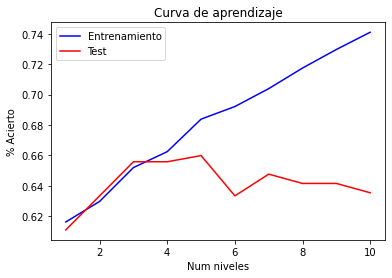

In [58]:
plt.plot(range(1, 11), entrenamiento, color="b", label="Entrenamiento")
plt.plot(range(1, 11), test, color="r", label="Test")
plt.title("Curva de aprendizaje")
plt.xlabel("Num niveles"), plt.ylabel("% Acierto"), plt.legend(loc="best")
plt.show()

Se puede observar que en este caso el valor óptimo para el número de niveles es 5 ya que se maximiza el acierto sobre los datos de validación (65,98%). A partir de ese punto podemos afirmar que nos encontramos con sobreaprendizaje ya que el acierto sobre validación baja mientras que sobre entrenamiento sube.

La gráfica de los aciertos sobre los datos de entrenamiento subirá hasta el 100% según vaya aumentando el número de niveles.

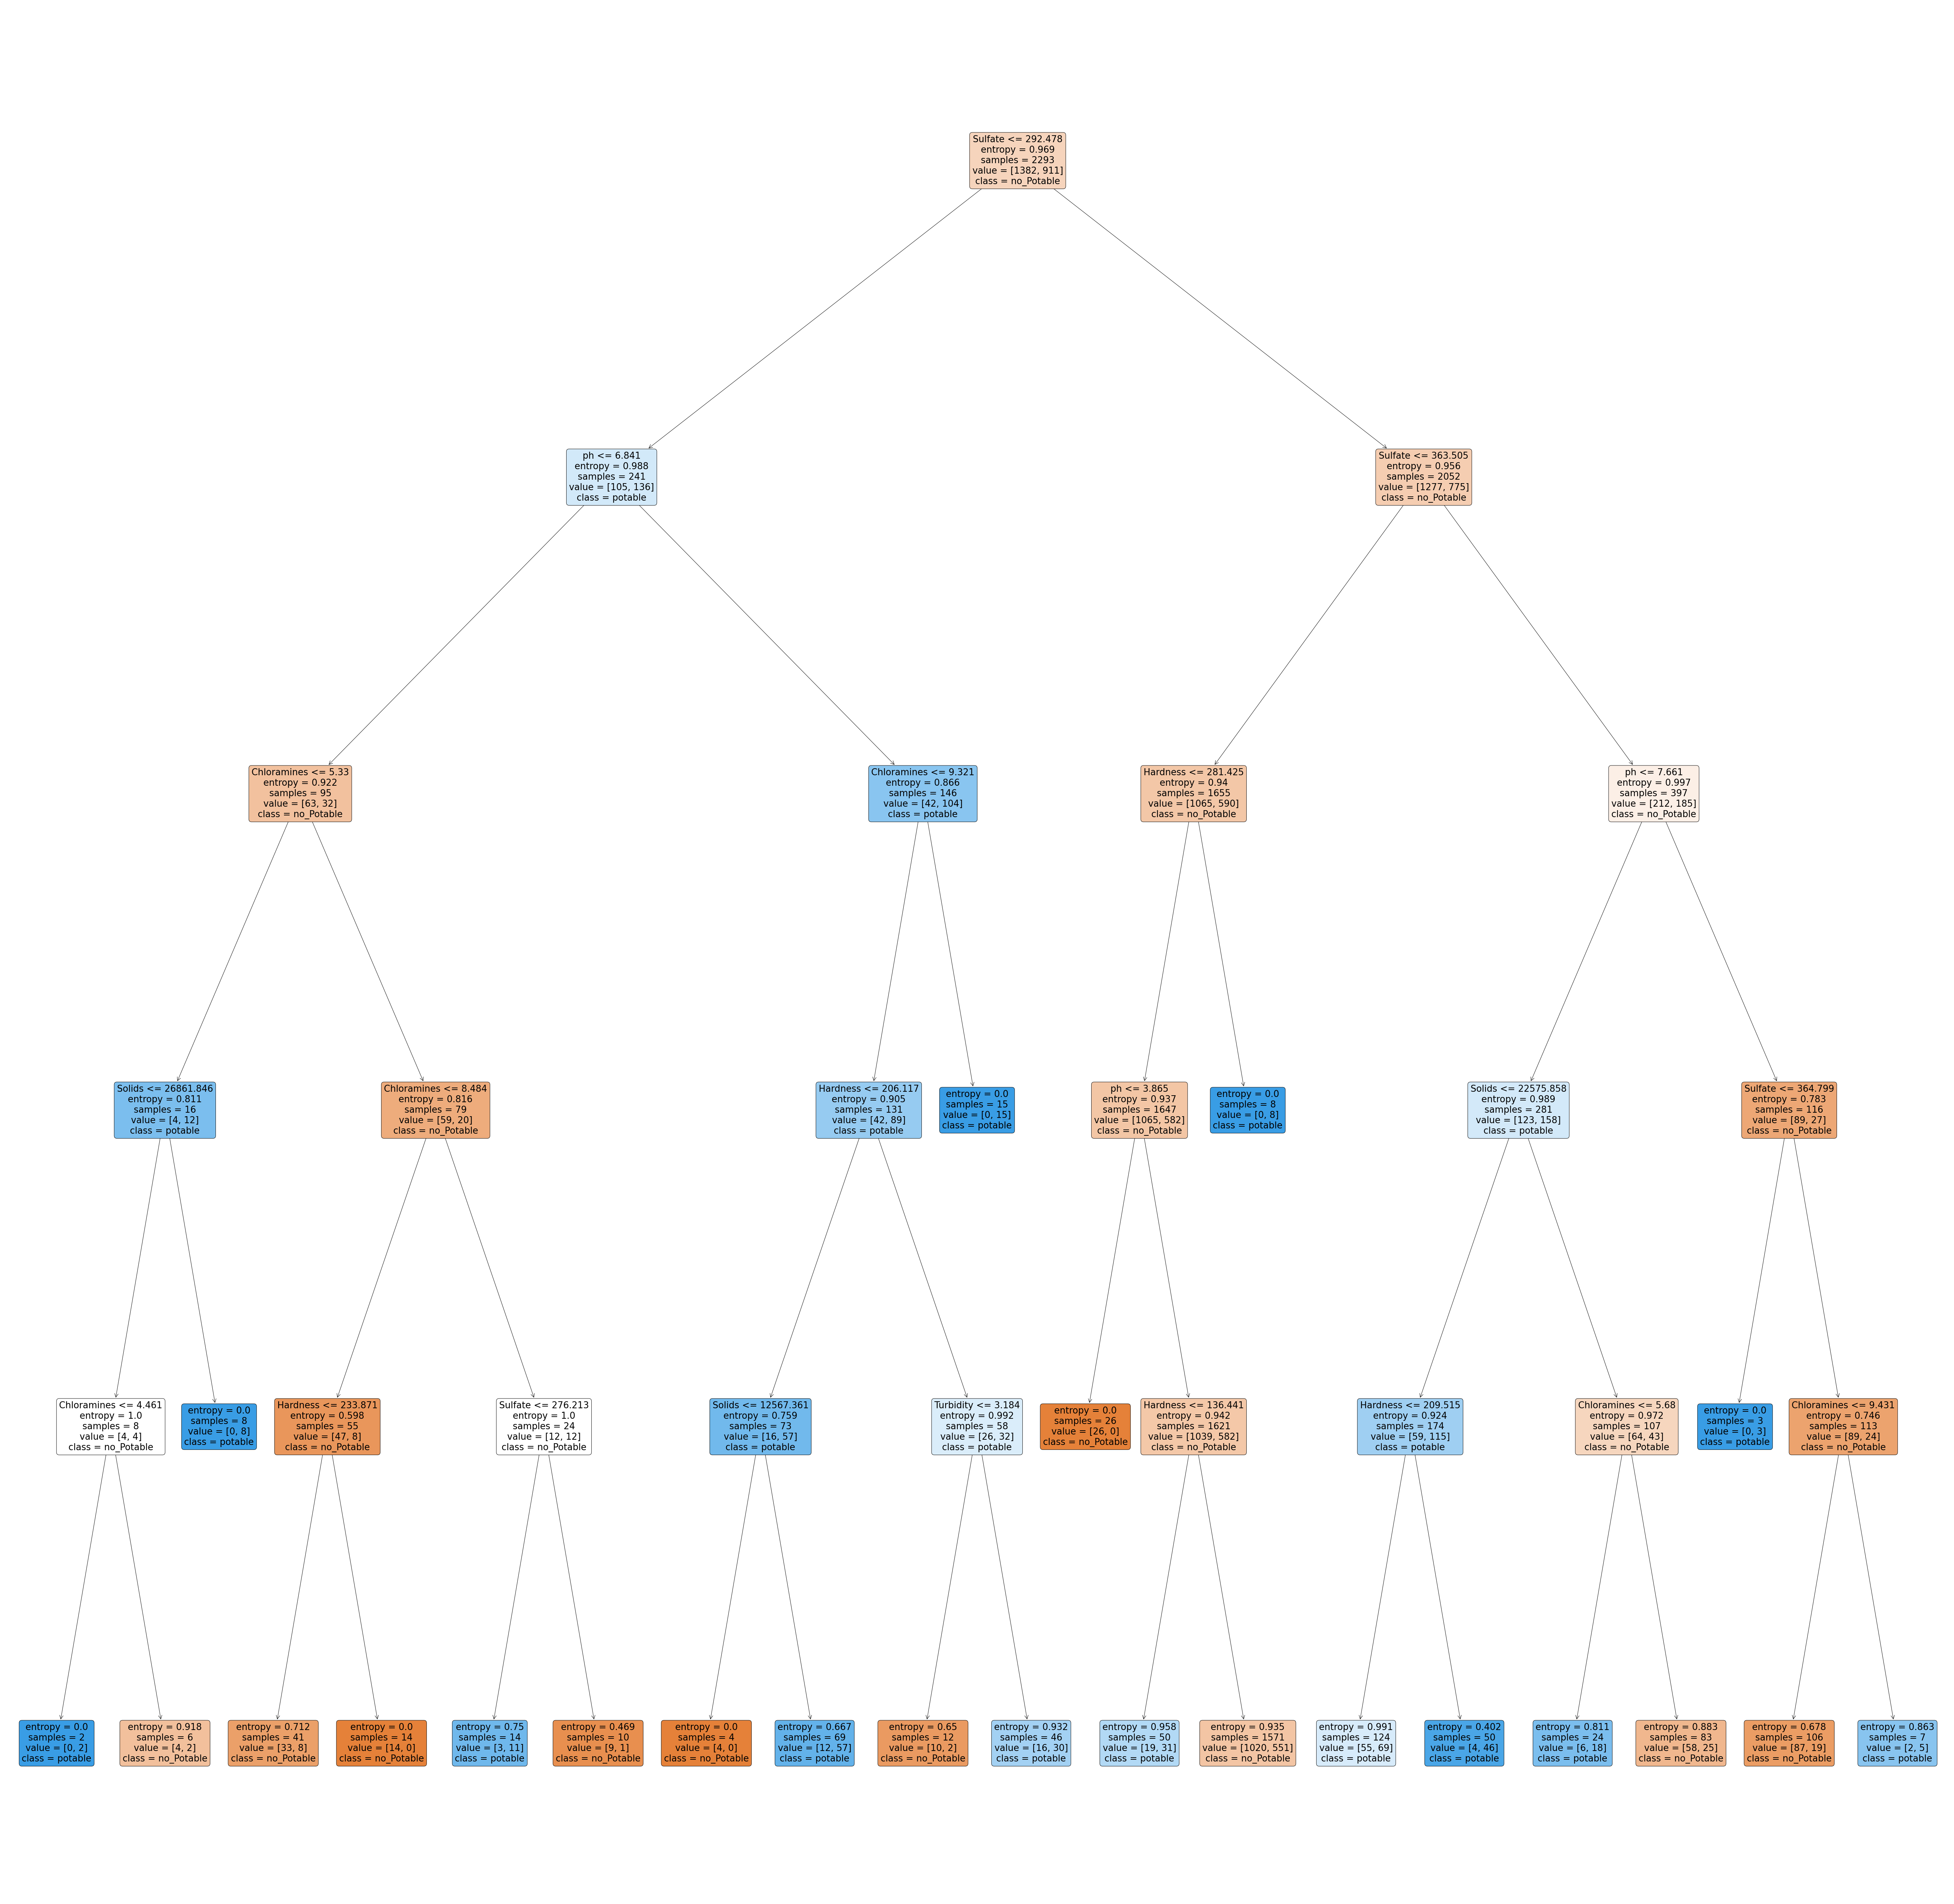

0.6097560975609756

In [59]:
clf3 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state = 123)
clf3 = clf3.fit(X_train, y_train)

plt.figure(figsize=(100, 100)) #, dpi = 50)
plot_tree(clf3, filled=True, feature_names=df.columns, class_names=target_values, rounded=True)
plt.show()

precision = accuracy_score(y_test, clf.predict(X_test))
precision

De nuevo nos encontramos con que sobre los datos de test la precisión baja ya que contendrá datos que se salen de la generalización que ha hecho el árbol de decisión.

En conclusión: